In [48]:
import geopandas as gpd
import pandas as pd
import geojson
from requests import Request, Session


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
import json
from esridump.dumper import EsriDumper
from esridump.esri2geojson import esri2geojson

d = EsriDumper('https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/tigerWMS_ACS2019/MapServer/84')

# Iterate over each feature
for feature in d:
#     print(json.dumps(feature))
# specify output fields as geometry, NAME, STATE, GEOID, OBJECTID
# specify where as state = 36 

#     print(json.dumps(feature, indent=4, sort_keys=True))
    print(feature, ' : ', d[feature])
#     properties == {
# #         'where': '',
#         'outFields': 'geometry, GEOID, STATE, NAME, OBJECTID',
#     }
# for i in range (len(parsed_response["data"])):
#     print(json["properties"][i]["GEOID"])
#     print(json.dumps(feature["geometry, GEOID, STATE, NAME, OBJECTID"]))
#     d3 = gpd.GeoDataFrame.from_features(d)

TypeError: 'EsriDumper' object is not subscriptable

In [46]:
# d3.plot()
res = {key: all_features[key] for key in all_features.keys() 
                               & {'geometry', 'STATE'}} 
# d3.head()

AttributeError: 'list' object has no attribute 'keys'

In [45]:
# Or get all features in one list
all_features = list(d)

d2 = gpd.GeoDataFrame.from_features(d)
d2.head()

,geometry,MTFCC,OID,GEOID,STATE,STATENS,BASENAME,NAME,LSADC,FUNCSTAT,AREALAND,AREAWATER,REGION,DIVISION,STUSAB,CENTLAT,CENTLON,INTPTLAT,INTPTLON,OBJECTID
0,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",G4000,27459156252396,54,54,01779805,West Virginia,West Virginia,00,A,62266312017,489190656,3,5,WV,+38.6411860,-080.6234555,+38.6472854,-080.6183274,1
1,"MULTIPOLYGON (((-86.39964 30.22696, -86.40262 ...",G4000,2745946365780,12,12,00294478,Florida,Florida,00,A,138954404443,45979888072,3,5,FL,+28.4062029,-082.5022125,+28.3989775,-082.5143005,2
2,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",G4000,27459100360203,17,17,01779784,Illinois,Illinois,00,A,143779846608,6215740949,2,3,IL,+40.1006009,-089.1500886,+40.1028754,-089.1526108,3
3,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",G4000,27459186175787,27,27,00662849,Minnesota,Minnesota,00,A,206231744272,18949219952,2,4,MN,+46.3167433,-094.1982395,+46.3159573,-094.1996043,4
4,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",G4000,27459140608205,24,24,01714934,Maryland,Maryland,00,A,25151854722,6979212482,3,5,MD,+38.9463607,-076.6789663,+38.9466584,-076.6744939,5


In [72]:
state=26
state_val = str(state)
county_val = str(county)

NameError: name 'county' is not defined

In [78]:
state_string='STATE=state AND COUNTY=061'
state_query = state_string.replace('state', state_val).replace('county', county_val)

print(state_query)

NameError: name 'county_val' is not defined

In [74]:
##Adding in census geographies
global state_query, state_string 

state_string='STATE=state'
state_query = state_string.replace('state', state)

# states link
endpoint = 'https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/tigerWMS_ACS2019/MapServer/84/query'
s = requests.session()
s.params = {
    'where': state_query,
    'text': '',
    'objectIds': '',
    'time': '',
    'geometry': '[[-2336502.536,-20037700.],[1.1615796196E7,2.0656504635E7]]',
    'geometryType': 'esriGeometryEnvelope',
    'inSR': 102100, # EPSG 3857
    'spatialRel': 'esriSpatialRelIntersects',
    'relationParam': '',
#specify fields
    'outFields': 'GEOID,STATE,NAME,STGEOMETRY, OBJECTID',
    'returnGeometry': True,
    'returnTrueCurves': False,
    'maxAllowableOffset': '',
    'geometryPrecision': '',
    'outSR': '',
    'returnIdsOnly': False,
    'returnCountOnly': False,
    'orderByFields': '',
    'groupByFieldsForStatistics': '',
    'outStatistics': '',
    'returnZ': False,
    'returnM': False,
    'gdbVersion': '',
    'returnDistinctValues': False,
    'f': 'geojson',        
}
start = 0
done = False
features = []
crs = None
while not done:
    r = s.get(endpoint, params={
        'resultOffset': start,
        'resultRecordCount': 32,
    })
    r.raise_for_status()
    states = geojson.loads(r.text)
    newfeats = states.__geo_interface__['features']
    if newfeats:
        features.extend(newfeats)
        crs=states.__geo_interface__['crs']
        start += len(newfeats)
        print("Received", len(newfeats), "entries,", start, "total")
    else:
        done = True
        
states_df = gpd.GeoDataFrame.from_features(features, crs=crs)

TypeError: replace() argument 2 must be str, not int

In [77]:
##Adding in census geographies
global state_query, state_string 
state=26
state_val = str(state)

state_string = 'STATE=state'
state_query = state_string.replace('state', state_val)

# census tracts link
endpoint = 'https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/Tracts_Blocks/MapServer/4/query'
s = requests.session()
s.params = {
    'where': state_query,
    'text': '',
    'objectIds': '',
    'time': '',
    'geometry': '[[-2336502.536,-20037700.],[1.1615796196E7,2.0656504635E7]]',
    'geometryType': 'esriGeometryEnvelope',
    'inSR': 102100, # EPSG 3857
    'spatialRel': 'esriSpatialRelIntersects',
    'relationParam': '',
#specify fields
    'outFields': 'GEOID,STATE,COUNTY,TRACT,STGEOMETRY, OBJECTID',
    'returnGeometry': True,
    'returnTrueCurves': False,
    'maxAllowableOffset': '',
    'geometryPrecision': '',
    'outSR': '',
    'returnIdsOnly': False,
    'returnCountOnly': False,
    'orderByFields': '',
    'groupByFieldsForStatistics': '',
    'outStatistics': '',
    'returnZ': False,
    'returnM': False,
    'gdbVersion': '',
    'returnDistinctValues': False,
    'f': 'geojson',        
}
start = 0
done = False
features = []
crs = None
while not done:
    r = s.get(endpoint, params={
        'resultOffset': start,
        'resultRecordCount': 32,
    })
    r.raise_for_status()
    tracts = geojson.loads(r.text)
    newfeats = tracts.__geo_interface__['features']
    if newfeats:
        features.extend(newfeats)
        crs=tracts.__geo_interface__['crs']
        start += len(newfeats)
        print("Received", len(newfeats), "entries,", start, "total")
    else:
        done = True
tracts_df = gpd.GeoDataFrame.from_features(features, crs=crs)

Received 32 entries, 32 total
Received 32 entries, 64 total
Received 32 entries, 96 total
Received 32 entries, 128 total
Received 32 entries, 160 total
Received 32 entries, 192 total
Received 32 entries, 224 total
Received 32 entries, 256 total
Received 32 entries, 288 total
Received 32 entries, 320 total
Received 32 entries, 352 total
Received 32 entries, 384 total
Received 32 entries, 416 total
Received 32 entries, 448 total
Received 32 entries, 480 total
Received 32 entries, 512 total
Received 32 entries, 544 total
Received 32 entries, 576 total
Received 32 entries, 608 total
Received 32 entries, 640 total
Received 32 entries, 672 total
Received 32 entries, 704 total
Received 32 entries, 736 total
Received 32 entries, 768 total
Received 32 entries, 800 total
Received 32 entries, 832 total
Received 32 entries, 864 total
Received 32 entries, 896 total
Received 32 entries, 928 total
Received 32 entries, 960 total
Received 32 entries, 992 total
Received 32 entries, 1024 total
Received 3

,geometry,GEOID,STATE,COUNTY,TRACT,OBJECTID
0,"POLYGON ((-83.47445 42.43589, -83.47442 42.435...",26163560200,26,163,560200,205
1,"POLYGON ((-84.59789 43.41821, -84.59790 43.417...",26057000400,26,057,000400,244
2,"POLYGON ((-83.14664 42.38103, -83.14651 42.380...",26163534100,26,163,534100,260
3,"POLYGON ((-83.96642 42.46184, -83.96631 42.460...",26093733602,26,093,733602,270
4,"POLYGON ((-83.93187 43.22038, -83.93207 43.220...",26049012601,26,049,012601,278


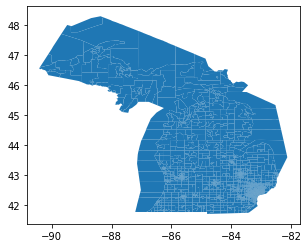

In [79]:
tracts_df.plot()
tracts_df.head()

In [ ]:
##Adding in census geographies
state='36'

# micropolitan statistical areas link
endpoint = 'https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/tigerWMS_ACS2019/MapServer/82/query'
s = requests.session()
s.params = {
    'where': 'STATE=36',
    'text': '',
    'objectIds': '',
    'time': '',
    'geometry': '[[-2336502.536,-20037700.],[1.1615796196E7,2.0656504635E7]]',
    'geometryType': 'esriGeometryEnvelope',
    'inSR': 102100, # EPSG 3857
    'spatialRel': 'esriSpatialRelIntersects',
    'relationParam': '',
#specify fields
    'outFields': 'GEOID,CBSA,CSA,NAME,STGEOMETRY, OBJECTID',
    'returnGeometry': True,
    'returnTrueCurves': False,
    'maxAllowableOffset': '',
    'geometryPrecision': '',
    'outSR': '',
    'returnIdsOnly': False,
    'returnCountOnly': False,
    'orderByFields': '',
    'groupByFieldsForStatistics': '',
    'outStatistics': '',
    'returnZ': False,
    'returnM': False,
    'gdbVersion': '',
    'returnDistinctValues': False,
    'f': 'geojson',        
}
start = 0
done = False
features = []
crs = None
while not done:
    r = s.get(endpoint, params={
        'resultOffset': start,
        'resultRecordCount': 32,
    })
    r.raise_for_status()
    mic_sa = geojson.loads(r.text)
    newfeats = mic_sa.__geo_interface__['features']
    if newfeats:
        features.extend(newfeats)
        crs=mic_sa.__geo_interface__['crs']
        start += len(newfeats)
        print("Received", len(newfeats), "entries,", start, "total")
    else:
        done = True
mic_sa_df = gpd.GeoDataFrame.from_features(features, crs=crs)

In [ ]:
mic_sa_df.plot()
mic_sa_df.head()

In [ ]:
##Adding in census geographies
state='36'

# metropolican statistical areas link
endpoint = 'https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/tigerWMS_ACS2019/MapServer/80/query'
s = requests.session()
s.params = {
    'where': 'STATE=state',
    'text': '',
    'objectIds': '',
    'time': '',
    'geometry': '[[-2336502.536,-20037700.],[1.1615796196E7,2.0656504635E7]]',
    'geometryType': 'esriGeometryEnvelope',
    'inSR': 102100, # EPSG 3857
    'spatialRel': 'esriSpatialRelIntersects',
    'relationParam': '',
#specify fields
    'outFields': 'GEOID,CBSA,CSA,NAME,STGEOMETRY, OBJECTID',
    'returnGeometry': True,
    'returnTrueCurves': False,
    'maxAllowableOffset': '',
    'geometryPrecision': '',
    'outSR': '',
    'returnIdsOnly': False,
    'returnCountOnly': False,
    'orderByFields': '',
    'groupByFieldsForStatistics': '',
    'outStatistics': '',
    'returnZ': False,
    'returnM': False,
    'gdbVersion': '',
    'returnDistinctValues': False,
    'f': 'geojson',        
}
start = 0
done = False
features = []
crs = None
while not done:
    r = s.get(endpoint, params={
        'resultOffset': start,
        'resultRecordCount': 32,
    })
    r.raise_for_status()
    met_sa = geojson.loads(r.text)
    newfeats = met_sa.__geo_interface__['features']
    if newfeats:
        features.extend(newfeats)
        crs=met_sa.__geo_interface__['crs']
        start += len(newfeats)
        print("Received", len(newfeats), "entries,", start, "total")
    else:
        done = True
met_sa_df = gpd.GeoDataFrame.from_features(features, crs=crs)

In [ ]:
met_sa_df.plot()
met_sa_df.head()

In [ ]:
tracts_df.to_file('tracts.geojson', driver='GeoJSON')
# met-sa_df.to_file('met-sa.geojson', driver='GeoJSON')
# mic-sa_df.to_file('mic-sa.geojson', driver='GeoJSON')

In [ ]:
# import ipywidgets
from arcgis.gis import GIS

gis = GIS() # Connect to ArcGIS Online as an anonymous user

m = gis.map("New York, NY", zoomlevel=11)
m.basemap = 'dark-gray-vector'
# geo_data = GeoData(geo_dataframe = test,
#                    style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
#                    hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
#                    name = 'Countries')


# m.add_layer(geo_data)
m.draw('circle')
m

# m.toggle_window_view()